![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [190]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

DR_NO  Date Rptd  ...  Status Desc                                 LOCATION
0  220314085 2022-07-22  ...  Invest Cont  2500 S  SYCAMORE                     AV
1  222013040 2022-08-06  ...  Invest Cont  3300    SAN MARINO                   ST
2  220614831 2022-08-18  ...  Invest Cont                        1900    TRANSIENT
3  231207725 2023-02-27  ...  Invest Cont  6200    4TH                          AV
4  220213256 2022-07-14  ...  Invest Cont  1200 W  7TH                          ST

[5 rows x 12 columns]

## Cleaning dataset

In [191]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


In [192]:
crimes.shape

(185715, 12)

In [193]:
# Checking missing values
crimes_missing = crimes.isna().sum()
crimes_missing

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex            11
Vict Descent        10
Weapon Desc     112213
Status Desc          0
LOCATION             0
dtype: int64

In [194]:
crimes['Vict Sex'].value_counts()

M    93008
F    89854
X     2812
H       30
Name: Vict Sex, dtype: int64

In [195]:
crimes['Vict Descent'].value_counts()

H    74128
W    44985
B    34931
O    16331
A     5519
X     4548
K     1389
F     1228
C     1210
J      433
V      327
I      322
Z      145
P       83
U       54
D       21
L       20
S       16
G       14
-        1
Name: Vict Descent, dtype: int64

In [196]:
# Find the five percent threshold
threshold = len(crimes) * 0.05
# create filter
cols_drop = crimes.columns[crimes_missing <= threshold]
# Drop missing value <= threshold
crimes.dropna(subset= cols_drop, inplace= True)

print(crimes.isna().sum())

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex             0
Vict Descent         0
Weapon Desc     112205
Status Desc          0
LOCATION             0
dtype: int64


In [197]:
print(crimes['Vict Descent'].unique())
print('------------------------------------------------------')
print(crimes['Vict Sex'].unique())
print('------------------------------------------------------')
# the Vict Descent column still has a "-" value, so I want to drop it
crimes = crimes[~(crimes['Vict Descent'] == '-')]
print(crimes['Vict Descent'].unique())

['B' 'H' 'W' 'O' 'C' 'K' 'V' 'X' 'A' 'F' 'J' 'P' 'I' 'S' 'Z' 'U' 'L' 'G'
 'D' '-']
------------------------------------------------------
['F' 'M' 'X' 'H']
------------------------------------------------------
['B' 'H' 'W' 'O' 'C' 'K' 'V' 'X' 'A' 'F' 'J' 'P' 'I' 'S' 'Z' 'U' 'L' 'G'
 'D']


In [198]:
# The 'Vict Sex' column still contains some values that may be errors, such as 'H' and 'X'. Therefore, I suggest dropping values from this column if they fall within a specified threshold.
# Step 1: Count the number of 'X' or 'H' in 'Vict Sex'
count_x_h = crimes['Vict Sex'].isin(['X', 'H']).sum()

# Step 2: Filter and drop rows where 'Vict Sex' is 'X' or 'H' and the count is below or equal to threshold
if count_x_h <= threshold:
    crimes = crimes[~crimes['Vict Sex'].isin(['X', 'H'])]

In [199]:
print(crimes['Vict Sex'].unique())

['F' 'M']


In [200]:
# Drop duplicates values
crimes.drop_duplicates()

DR_NO  ...                                  LOCATION
0       220314085  ...   2500 S  SYCAMORE                     AV
1       222013040  ...   3300    SAN MARINO                   ST
2       220614831  ...                         1900    TRANSIENT
3       231207725  ...   6200    4TH                          AV
4       220213256  ...   1200 W  7TH                          ST
...           ...  ...                                       ...
185710  231510379  ...   5300    DENNY                        AV
185711  231604807  ...  12500    BRANFORD                     ST
185712  231606525  ...  12800    FILMORE                      ST
185713  231210064  ...   6100 S  VERMONT                      AV
185714  230906458  ...  14500    HARTLAND                     ST

[182860 rows x 12 columns]

In [201]:
# For the 'Weapon Desc' column, I assume that null values indicate no weapon was used.
crimes['Weapon Desc'].fillna('no weapon was used', inplace=True)

crimes['Weapon Desc'].unique()

array(['no weapon was used', 'VERBAL THREAT',
       'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)',
       'PHYSICAL PRESENCE', 'UNKNOWN WEAPON/OTHER WEAPON', 'OTHER KNIFE',
       'HAND GUN', 'FIXED OBJECT', 'KNIFE WITH BLADE 6INCHES OR LESS',
       'SEMI-AUTOMATIC PISTOL', 'BLUNT INSTRUMENT',
       'UNKNOWN TYPE CUTTING INSTRUMENT', 'BOTTLE', 'CLUB/BAT', 'SHOTGUN',
       'BELT FLAILING INSTRUMENT/CHAIN', 'MACHETE', 'ROCK/THROWN OBJECT',
       'RIFLE', 'ASSAULT WEAPON/UZI/AK47/ETC', 'UNKNOWN FIREARM',
       'SIMULATED GUN', 'PIPE/METAL PIPE', 'RAZOR',
       'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH', 'FOLDING KNIFE',
       'VEHICLE', 'RAZOR BLADE', 'MACE/PEPPER SPRAY', 'TIRE IRON',
       'EXPLOXIVE DEVICE', 'STICK', 'SCISSORS', 'KITCHEN KNIFE',
       'REVOLVER', 'FIRE', 'AIR PISTOL/REVOLVER/RIFLE/BB GUN', 'STUN GUN',
       'OTHER FIREARM', 'CONCRETE BLOCK/BRICK', 'SWITCH BLADE',
       'CAUSTIC CHEMICAL/POISON', 'HAMMER', 'OTHER CUTTING INSTRUMENT',
       'ICE PICK', 'SA

In [202]:
print(crimes.isna().sum())
print('------------------------------------------------------')
print(crimes.info())

DR_NO           0
Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA NAME       0
Crm Cd Desc     0
Vict Age        0
Vict Sex        0
Vict Descent    0
Weapon Desc     0
Status Desc     0
LOCATION        0
dtype: int64
------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 182860 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         182860 non-null  int64         
 1   Date Rptd     182860 non-null  datetime64[ns]
 2   DATE OCC      182860 non-null  datetime64[ns]
 3   TIME OCC      182860 non-null  object        
 4   AREA NAME     182860 non-null  object        
 5   Crm Cd Desc   182860 non-null  object        
 6   Vict Age      182860 non-null  int64         
 7   Vict Sex      182860 non-null  object        
 8   Vict Descent  182860 non-null  object        
 9   Weapon Desc   182860 non-null  object  

## Exploration Data Analyst

1. Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.

In [203]:
crimes.head(5)

DR_NO  Date Rptd  ...  Status Desc                                 LOCATION
0  220314085 2022-07-22  ...  Invest Cont  2500 S  SYCAMORE                     AV
1  222013040 2022-08-06  ...  Invest Cont  3300    SAN MARINO                   ST
2  220614831 2022-08-18  ...  Invest Cont                        1900    TRANSIENT
3  231207725 2023-02-27  ...  Invest Cont  6200    4TH                          AV
4  220213256 2022-07-14  ...  Invest Cont  1200 W  7TH                          ST

[5 rows x 12 columns]

In [204]:
crimes['HOUR OCC'] = crimes['TIME OCC'].str[:2].astype(int)

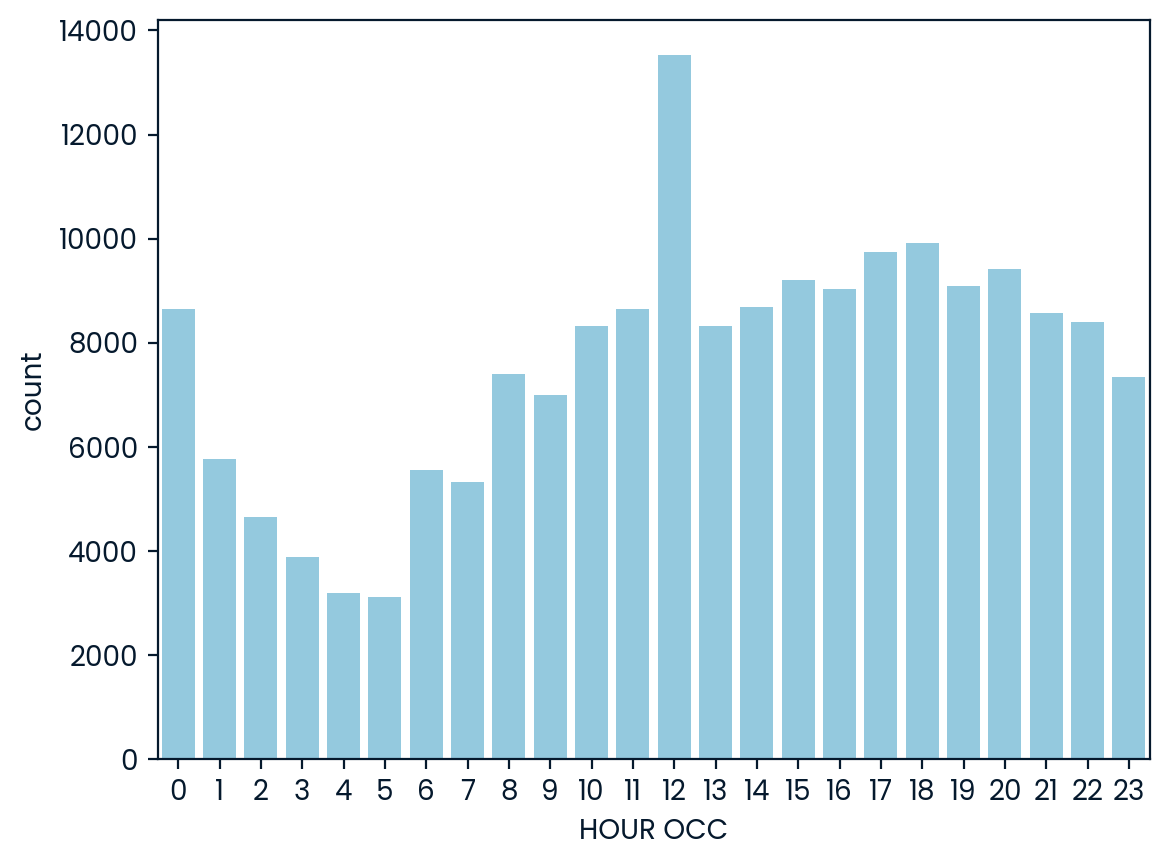

In [205]:
sns.countplot(data= crimes, x= 'HOUR OCC', color= 'skyblue')
plt.show()

In [206]:
peak_crime_hour = 12

2. Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location.

In [207]:
night_time = [22, 23, 24, 1, 2, 3, 4]

night_crimes = crimes[crimes['HOUR OCC'].isin(night_time)]
night_crimes_grouped = night_crimes.groupby('AREA NAME').count()
night_crimes_sorted = night_crimes_grouped.sort_values(by='HOUR OCC', ascending=False)
print(night_crimes_sorted)

             DR_NO  Date Rptd  DATE OCC  ...  Status Desc  LOCATION  HOUR OCC
AREA NAME                                ...                                 
Central       2982       2982      2982  ...         2982      2982      2982
Hollywood     2376       2376      2376  ...         2376      2376      2376
77th Street   2125       2125      2125  ...         2125      2125      2125
Olympic       1860       1860      1860  ...         1860      1860      1860
Southwest     1756       1756      1756  ...         1756      1756      1756
Newton        1752       1752      1752  ...         1752      1752      1752
Pacific       1718       1718      1718  ...         1718      1718      1718
Southeast     1688       1688      1688  ...         1688      1688      1688
Rampart       1608       1608      1608  ...         1608      1608      1608
N Hollywood   1573       1573      1573  ...         1573      1573      1573
Van Nuys      1474       1474      1474  ...         1474      1

In [208]:
peak_night_crime_location = 'Central'

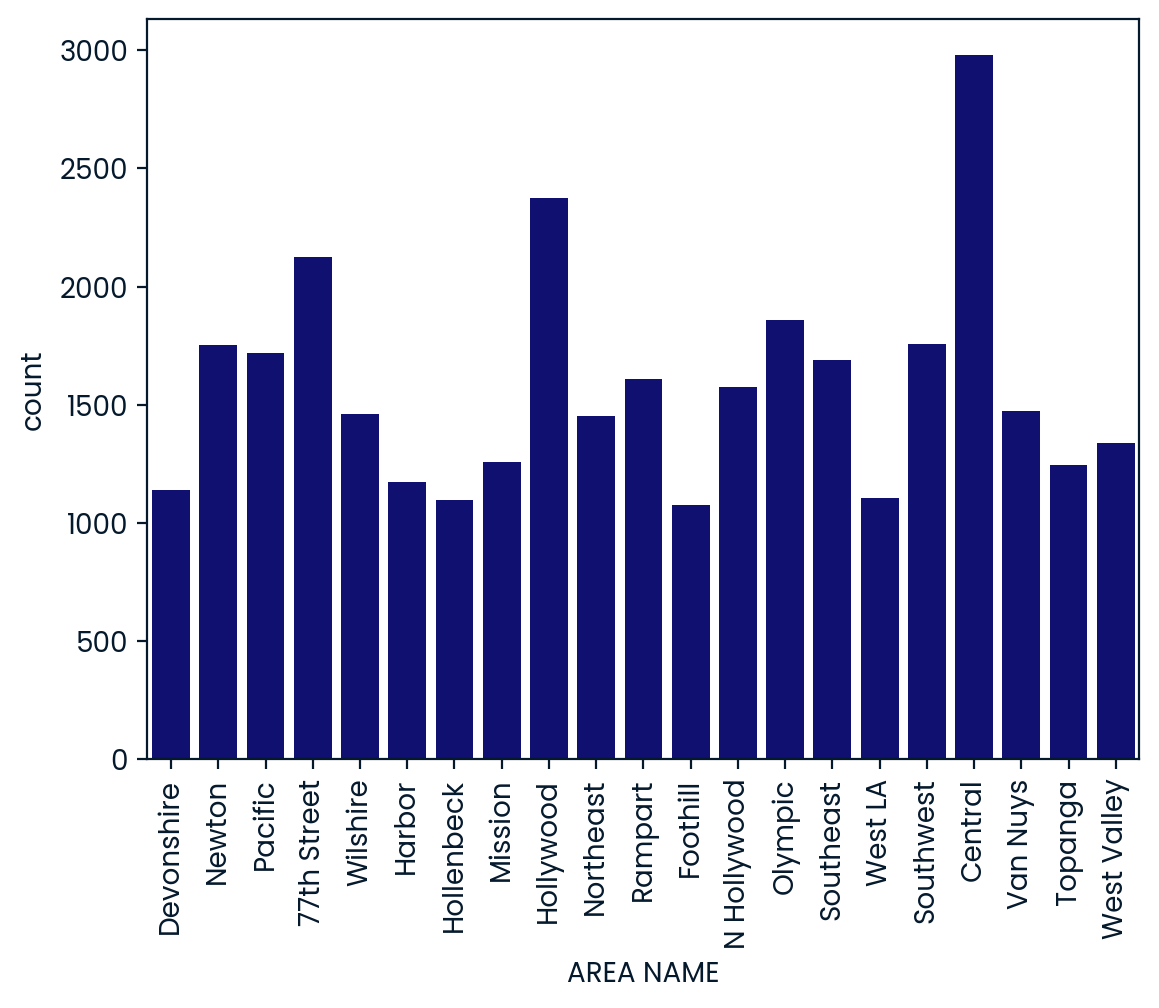

In [209]:
sns.countplot(data= night_crimes, x= 'AREA NAME', color= 'navy')
plt.xticks(rotation=90)
plt.show()

3. Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

In [210]:
## Identify the number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+) 
## Save as a pandas Series called victim_ages
# Create bins and labels for victim age ranges
vic_age_range = [0, 17, 25, 34, 44, 54, 64, np.inf]
vic_age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Add a new column using pd.cut() to bin values into discrete intervals
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"],
                               bins= vic_age_range,
                               labels= vic_age_labels)

# Find the category with the largest frequency
victim_ages = crimes["Age Bracket"].value_counts()
print(victim_ages)

26-34    47252
35-44    42004
45-54    28280
18-25    26039
55-64    20119
65+      14706
0-17      4460
Name: Age Bracket, dtype: int64


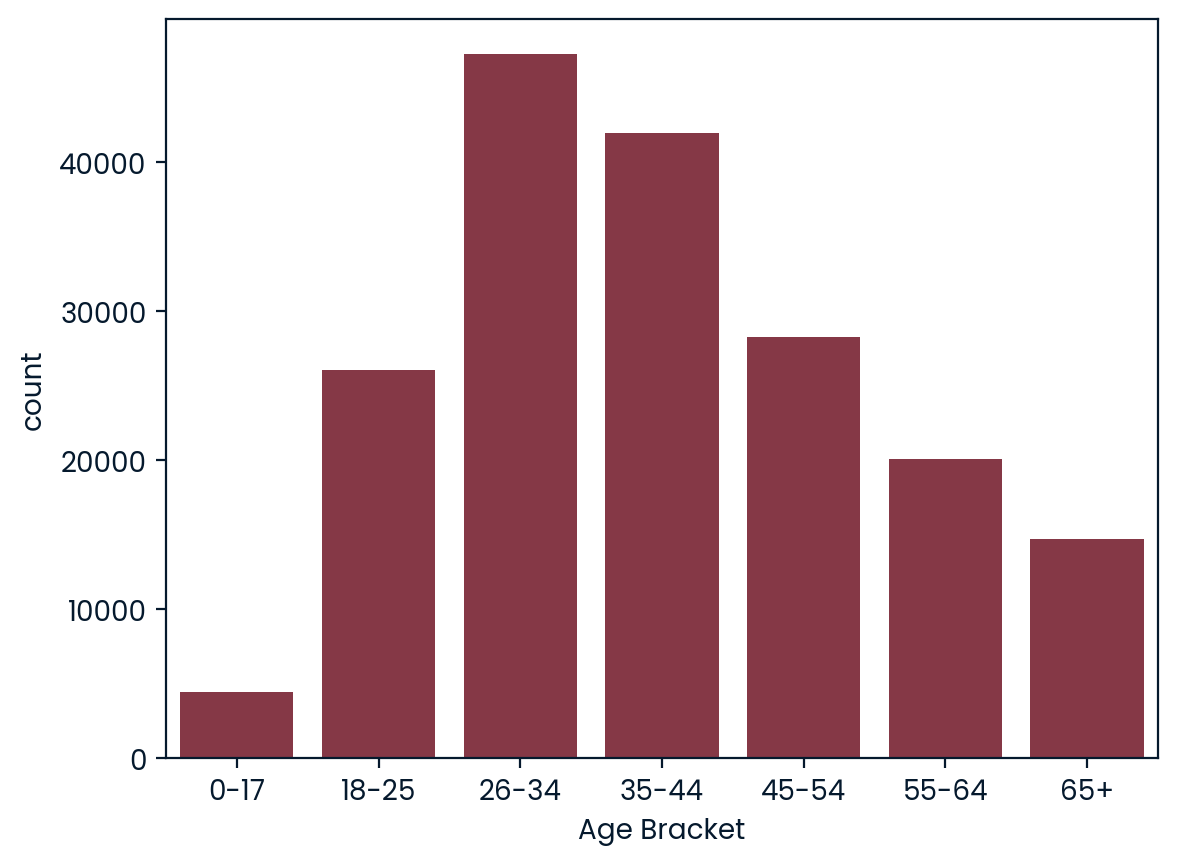

In [211]:
sns.countplot(data= crimes, x= 'Age Bracket', color= '#922b3e')
plt.show()